# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: mohammad hossein moslemi
2.   Student Number: 97102463


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

# ap = # Your Code

artist_dict=artists.set_index('id').T.to_dict('list')
plays2=plays.copy()
plays2['id']=plays2['artistID']
plays2['name']=plays2['artistID']
df2=plays2.replace({"name": artist_dict})
df2=df2.sort_values(['id','userID']).reset_index()
cols=['id','name','userID','artistID','weight']
ap=df2[cols]
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [4]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [5]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

#TODO
ap=ap.drop('id',axis=1)
ap

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [6]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


total_play_count_dict=dict(ap.groupby('name')['playCount'].sum())

tmp=dict(ap['name'].value_counts())

artist_rank=pd.DataFrame.from_dict({'name':tmp.keys(), 'totalUniqueUsers':tmp.values()})
artist_rank['totalArtistPlays']=artist_rank['name']
artist_rank=artist_rank.replace({"totalArtistPlays": total_play_count_dict})
artist_rank['avgUserPlays'] = artist_rank.apply(lambda row: row.totalArtistPlays /  + row.totalUniqueUsers, axis=1)
artist_rank=artist_rank.sort_values(['totalArtistPlays','name'],ascending=[False,False])
artist_rank=artist_rank.set_index('name')

artist_rank


,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
A.M. Architect,1,1,1.000000
500won Project,1,1,1.000000
2gether,1,1,1.000000


In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################




mergedDf = artist_rank.merge(ap, left_index=True, right_on='name')
mergedDf['id']=mergedDf['artistID']
cols=['id','name','userID','artistID','playCount','totalUniqueUsers','totalArtistPlays','avgUserPlays']
ap=mergedDf[cols]
ap=ap.sort_values(['playCount'],ascending=[False])





In [8]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [9]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

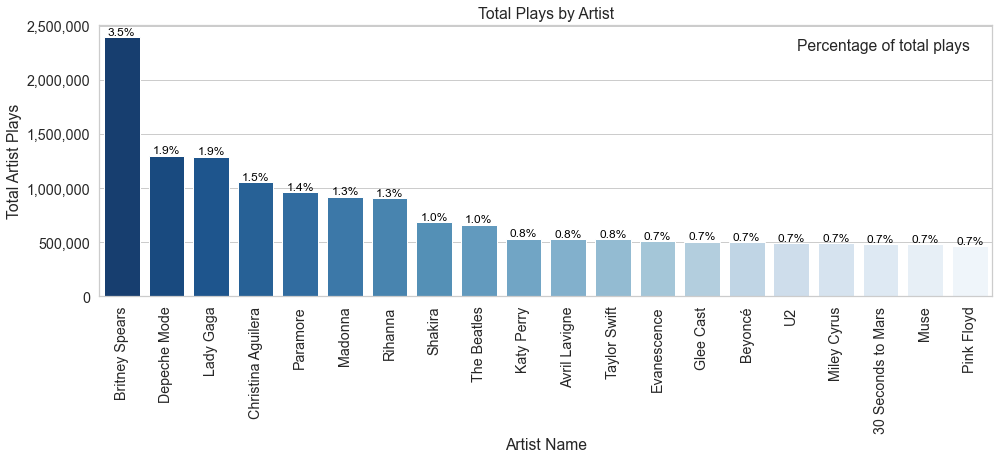

In [10]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

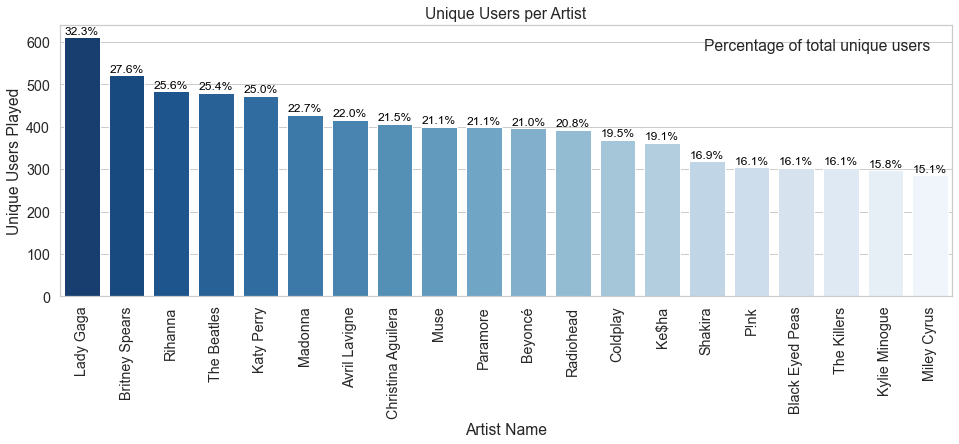

In [11]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [12]:
artist_rank.totalUniqueUsers

name
Britney Spears          522
Depeche Mode            282
Lady Gaga               611
Christina Aguilera      407
Paramore                399
                       ... 
A.M. Architect            1
500won Project            1
2gether                   1
(We Are) Performance      1
(Pre) Kingdom             1
Name: totalUniqueUsers, Length: 17632, dtype: int64

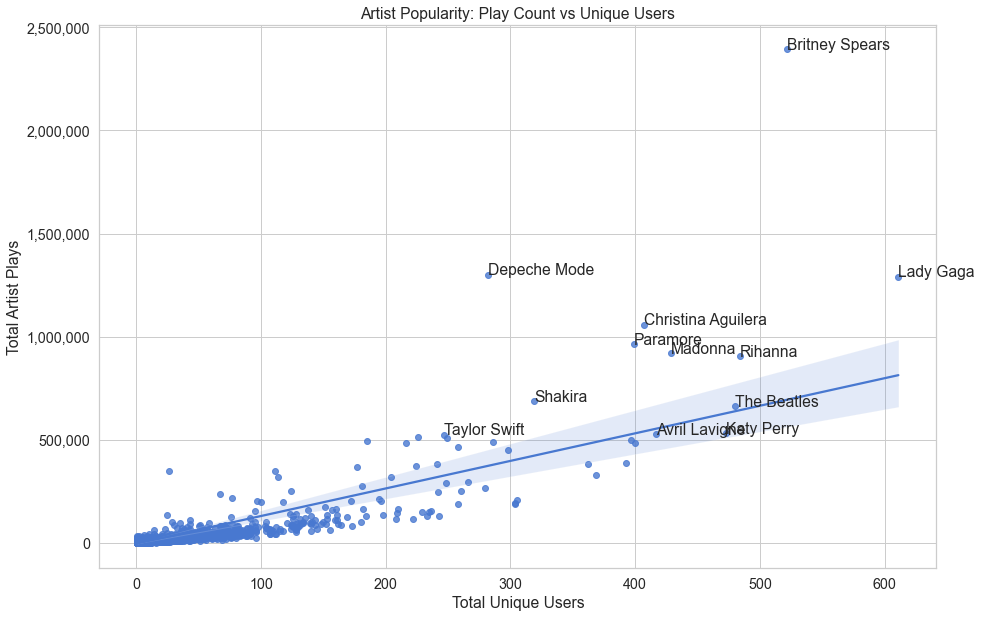

In [13]:


# top_artists =  # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"
top_artists=artist_rank.sort_values(['totalArtistPlays'],ascending=[False]).head(12).index


# x = # TODO : "totalUniqueUsers" of "artist_rank"
# y =  # TODO :  "totalArtistPlays" of "artist_rank"
# labels =  # TODO : index of "artist_rank"
x=artist_rank.totalUniqueUsers
y=artist_rank.totalArtistPlays
labels=artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [14]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [15]:
ap

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,792,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,511,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,203,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,498,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...,...
82029,9487,Love Is All,712,9487,1,3,847,282.333333,0.000000
16183,301,Alicia Keys,229,301,1,148,91066,615.310811,0.000000
18732,329,Justin Timberlake,229,329,1,140,91169,651.207143,0.000000
22841,429,The Smiths,1859,429,1,162,91740,566.296296,0.000000


In [16]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

userID=np.unique(list(ap['userID']))
artistID=np.unique(list(ap['artistID']))

matrix=[]
for i,row in enumerate(userID):
    tmp=ap[ap['userID']==row]
    tmp=tmp[['userID','artistID','playCount','totalArtistPlays','playCountScaled']]
    tmp['play_count_scaled']=tmp['playCount']/(tmp['totalArtistPlays'])
    tmp=tmp.drop('playCount',axis=1)
    tmp=tmp.drop('totalArtistPlays',axis=1)
    tmp=tmp.to_numpy()
    if i==0:
        matrix=tmp.copy()
    else:
        matrix=np.concatenate([matrix,tmp],axis=0)




Matrix=np.ones((len(userID),len(artistID)))*np.nan

for row in matrix:
    i=int(row[0])
    i=np.where(userID==i)[0][0]

    j=int(row[1])
    j=np.where(artistID==j)[0][0]

    value=(row[2])
    Matrix[i,j]=value

df=pd.DataFrame(Matrix)
df.index.names = ['userID']
df.columns.names = ['artistID']

ratings_df=df.copy()


In [17]:
ratings_df

artistID,0,1,2,3,4,5,6,7,8,9,...,17622,17623,17624,17625,17626,17627,17628,17629,17630,17631
userID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings=Matrix.copy()
ratings[np.isnan(ratings)]=0



In [19]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code

sparsity=np.sum(ratings==0)/ ( ratings.shape[0]*ratings.shape[1])

print('ratings matrix is', round(100*sparsity,3),'%', 'sparse')


## END




ratings matrix is 99.724 % sparse


# Fitting(Training) Model (50pts)

In [20]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################

def train_test_split(ratings):
    
    train=ratings.copy()
    validation=np.zeros(ratings.shape)

    for i,row in enumerate(ratings):
        if np.sum(row!=0) >= MIN_USER_RATINGS:
            index=np.random.choice(np.where(row!=0)[0], DELETE_RATING_COUNT , replace=False)
            validation[i][index]=ratings[i][index].copy()
            train[i][index]=0

    return train, validation



In [21]:
train, val = train_test_split(ratings)

In [22]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    index=ground_truth!=0
    
    prediction2 = prediction[index]
    ground_truth2 = ground_truth[index]
    return sqrt(mean_squared_error(prediction2, ground_truth2))

In [24]:

class Recommender():
    def __init__(self, rating_mat, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.rating_mat = rating_mat
        self.n_latent_features = n_latent_features
        self.learning_rate = learning_rate
        self.lmbda = lmbda
        self.n_epochs = n_epochs
        self.num_users, self.num_items = rating_mat.shape

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.n_latent_features, size=(self.num_users, self.n_latent_features))
        self.Q = np.random.normal(scale=1./self.n_latent_features, size=(self.num_items, self.n_latent_features))

        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.rating_mat[np.where(self.rating_mat != 0)])

        # Create a list of training samples
        self.samples = [
            (i, j, self.rating_mat[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.rating_mat[i, j] > 0
        ]
        training_process = []
        for i in range(self.n_epochs):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))
        return training_process

    def mse(self):
        xs, ys = self.rating_mat.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.rating_mat[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            self.b_u[i] += self.learning_rate * (e - self.lmbda * self.b_u[i])
            self.b_i[j] += self.learning_rate * (e - self.lmbda * self.b_i[j])
            self.P[i, :] += self.learning_rate * (e * self.Q[j, :] - self.lmbda * self.P[i,:])
            self.Q[j, :] += self.learning_rate * (e * self.P[i, :] - self.lmbda * self.Q[j,:])

    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def full_matrix(self):
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)

In [27]:
#creating recommender object
recommender = Recommender(ratings)

training_process = recommender.train()

print()
print("P x Q:")
print(recommender.full_matrix())
print()
print("Global bias:")
print(recommender.b)
print()
print("User bias:")
print(recommender.b_u)
print()
print("Item bias:")
print(recommender.b_i)

Iteration: 10 ; error = 46.2164
Iteration: 20 ; error = 38.7468
Iteration: 30 ; error = 33.4152
Iteration: 40 ; error = 29.2769
Iteration: 50 ; error = 25.9148
Iteration: 60 ; error = 23.1069
Iteration: 70 ; error = 20.7190
Iteration: 80 ; error = 18.6625
Iteration: 90 ; error = 16.8749
Iteration: 100 ; error = 15.3105
Iteration: 110 ; error = 13.9340
Iteration: 120 ; error = 12.7181
Iteration: 130 ; error = 11.6408
Iteration: 140 ; error = 10.6842
Iteration: 150 ; error = 9.8334
Iteration: 160 ; error = 9.0761
Iteration: 170 ; error = 8.4017
Iteration: 180 ; error = 7.8011
Iteration: 190 ; error = 7.2667
Iteration: 200 ; error = 6.7915

P x Q:
[[ 0.00993765  0.01167334 -0.02671927 ...  0.01677834  0.0058662
   0.00043367]
 [-0.027336   -0.00630787  0.03425585 ...  0.02547052  0.02618236
   0.02396624]
 [-0.04206885 -0.00398429 -0.05324549 ...  0.03330085  0.02689259
   0.07473063]
 ...
 [ 0.03499039  0.00419633 -0.06618109 ... -0.06299328 -0.0353035
  -0.0277228 ]
 [-0.01096813 -0.003

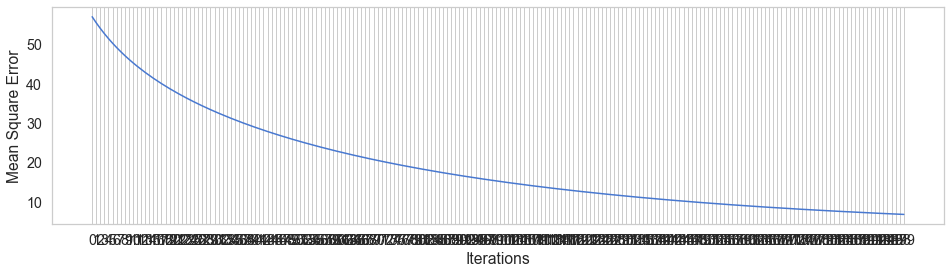

In [28]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")